LOADING THE DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/winequality-red.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [3]:
column_names=dataset.columns.to_list()
print(column_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


DATA VISUALIZATION

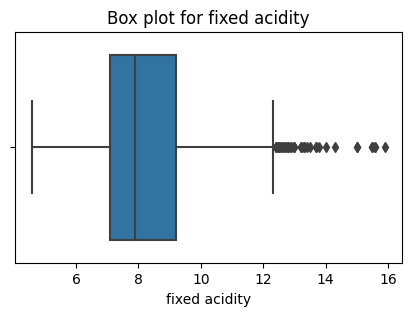

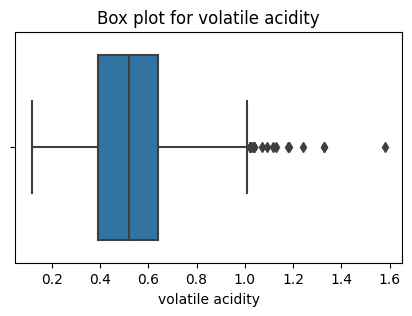

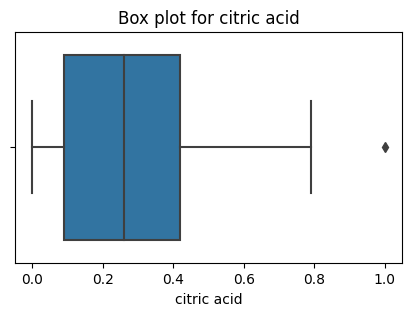

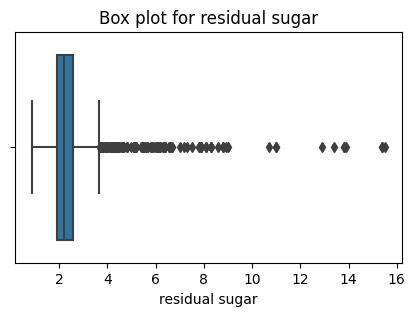

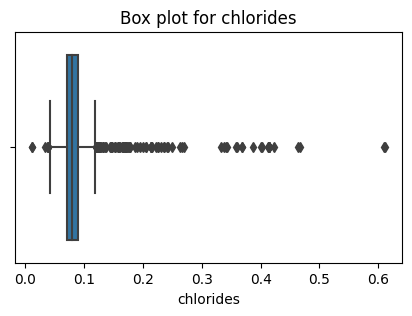

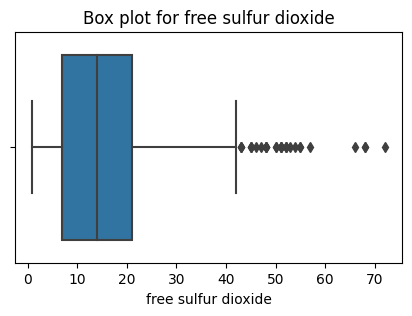

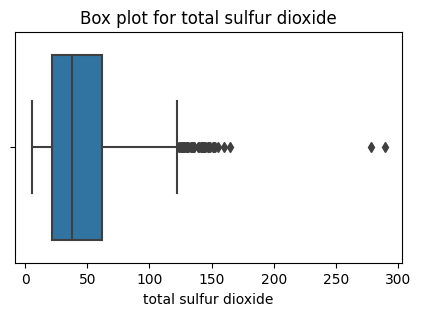

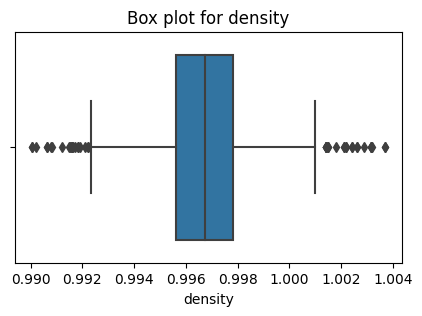

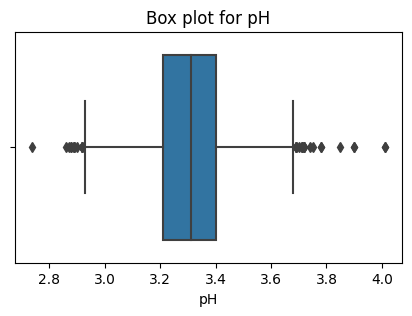

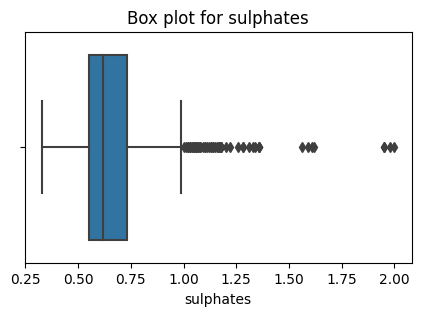

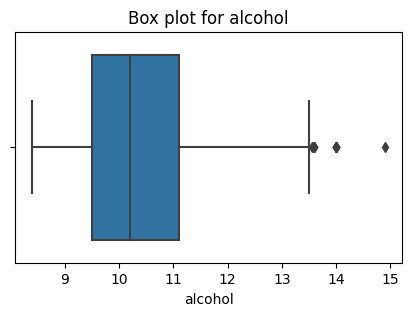

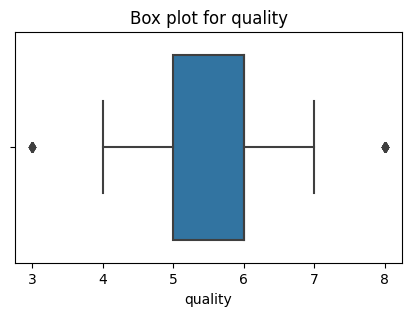

In [5]:
for i in range(len(column_names)):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=dataset[column_names[i]])
  plt.title(f'Box plot for {column_names[i]}')

Text(0.5, 1.0, 'Correlation Heatmap')

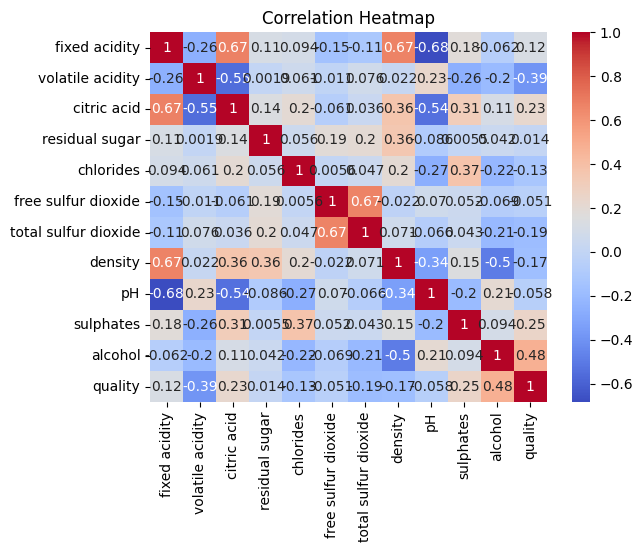

In [6]:
correlation_matrix=dataset.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')


**DATA PREPROCESSING**

1. Taking care of missing values

In [4]:
dataset.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit_transform(x[:,:-1])

array([[7.4    , 0.7    , 0.     , ..., 0.9978 , 3.51   , 0.56   ],
       [7.8    , 0.88   , 0.     , ..., 0.9968 , 3.2    , 0.68   ],
       [7.8    , 0.76   , 0.04   , ..., 0.997  , 3.26   , 0.65   ],
       ...,
       [6.3    , 0.51   , 0.13   , ..., 0.99574, 3.42   , 0.75   ],
       [5.9    , 0.645  , 0.12   , ..., 0.99547, 3.57   , 0.71   ],
       [6.     , 0.31   , 0.47   , ..., 0.99549, 3.39   , 0.66   ]])

2.Handling Outliers

In [39]:
for i in column_names:
  q1=dataset[i].quantile(0.25)
  q3=dataset[i].quantile(0.75)
  iqr=q3-q1
  upper_limit=q3+1.5*iqr
  lower_limit=q1-1.5*iqr
  for j in dataset[i]:
    if j>upper_limit or j<lower_limit:
      dataset[i]=dataset[i].replace(j,np.median(dataset[i]))




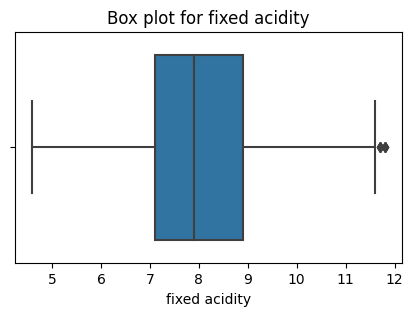

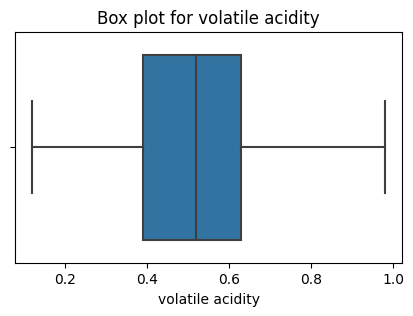

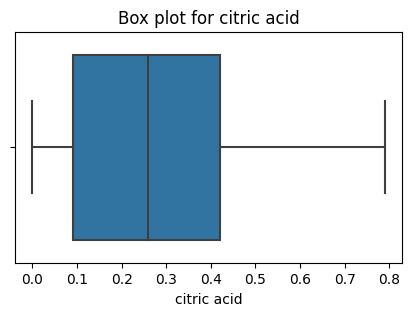

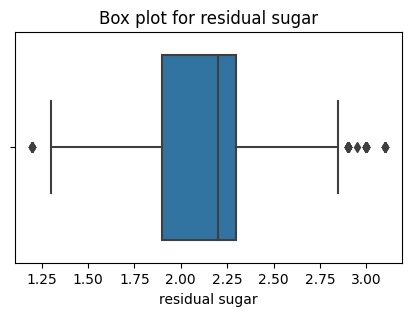

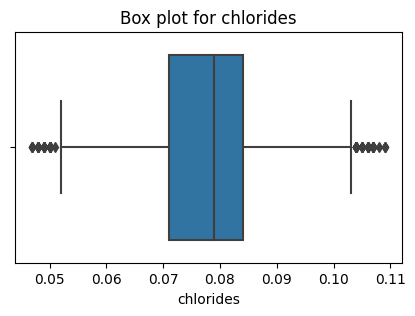

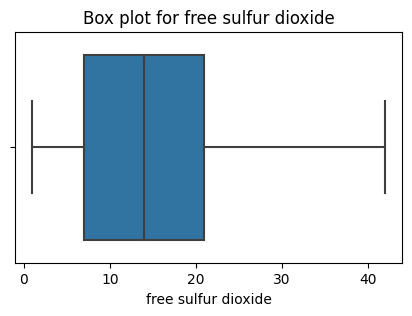

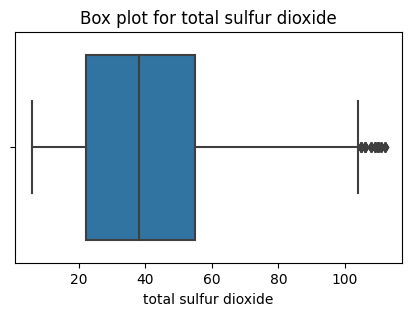

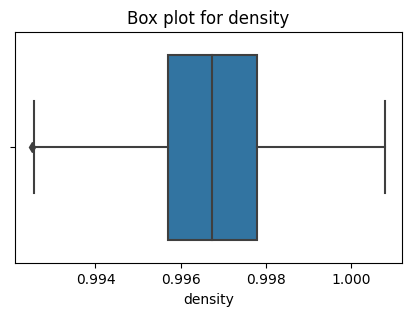

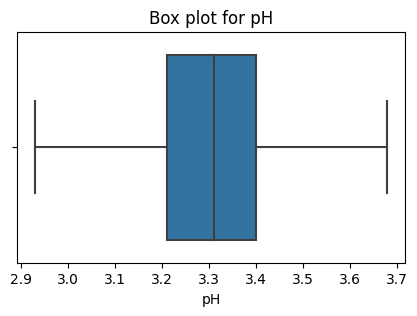

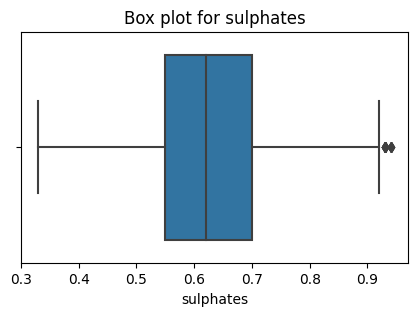

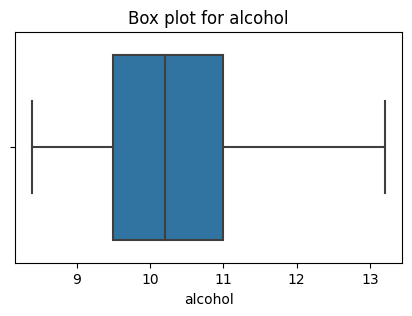

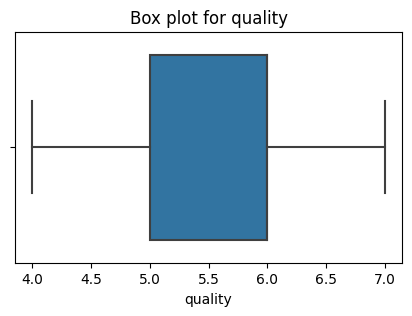

In [30]:
for i in range(len(column_names)):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=dataset[column_names[i]])
  plt.title(f'Box plot for {column_names[i]}')

3.Splitting the dataset into training set and test set

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


4.Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

5.Applying a machine learning model

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100, criterion='gini',random_state=25)
classifier.fit(x_train,y_train)


RandomForestClassifier(random_state=25)

In [48]:
y_pred_test = classifier.predict(x_test)

#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

6.Making the confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
print(classification_report(y_test,y_pred_test))
accuracy_score(y_test, y_pred_test)


[[  0   0   0   2   0   0]
 [  0   0  10   4   0   0]
 [  0   0 135  30   4   0]
 [  0   0  33 124  13   0]
 [  0   0   2  14  22   2]
 [  0   0   0   2   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.75      0.80      0.77       169
           6       0.70      0.73      0.72       170
           7       0.52      0.55      0.54        40
           8       0.00      0.00      0.00         5

    accuracy                           0.70       400
   macro avg       0.33      0.35      0.34       400
weighted avg       0.67      0.70      0.69       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7025